In [23]:
from utils.ActionGenerator import ActionsGenerator
from utils.plot_regret import plot_regret 
from utils.Play import play 
from utils.Experiment import experiment
from Agents.UCB import UCB
from Agents.LinUCB import LinUCB
from Agents.RB_agent import RegretBalancingAgent
from environments.BanditEnv import BanditEnv
from environments.BernoulliBanditEnv import BernoulliBanditEnv
from environments.LinearBandit import LinearBandit
from kaggle_environments import make, evaluate
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from Agents.EpsilonGreedy import EpsilonGreedy
np.random.seed(1306)

# Regret Balancing for Bandits : Experience 1 

c:\Users\theom\Desktop\AML\Advanced-ML\src\utils\plot_regret.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  reg_plot.show()


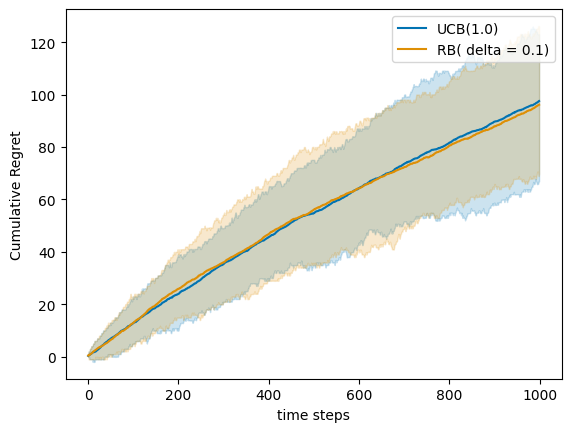

In [5]:
n_arms = 4
means = [0.1, 0.2, 0.3, 0.4]
n_rounds = 1000
delta = 0.1
env = BernoulliBanditEnv(means = means)
ucb_agent = UCB(K = len(means), var = 1.0)
rb_agent = RegretBalancingAgent(K = len(means), delta = delta)
Nmc = 100  # Number of Monte Carlo simulations
T = 1000  # Number of rounds
agents = [ucb_agent, rb_agent]
all_data = experiment(env, agents, Nmc, T)
# Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

# Regret Balancing for Bandits : Experience 2 (Optimizing the Exploration Rate)

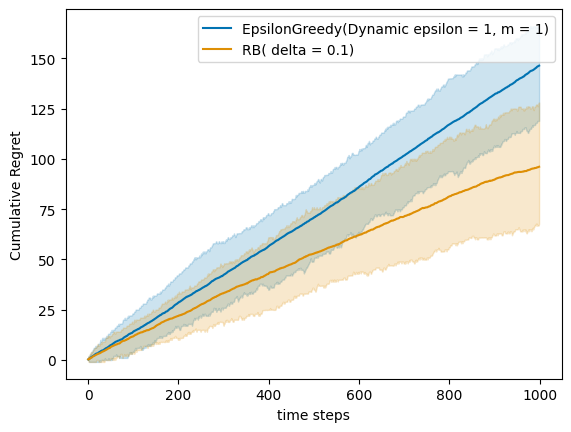

In [6]:
base_algorithms = [EpsilonGreedy(K=len(means), eps = 2 ** (-i), FixedEpsilon = True, m = 1) for i in range(1, 19)]

delta = 0.1  # Confidence level for regret balancing
rb_agent = RegretBalancingAgent(K = len(means), delta = delta)

# Experiment
algorithms = base_algorithms + [rb_agent]
all_data = experiment(env, algorithms, Nmc, T)

# Plotting results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

# Regret Balacing Experiment 3 : Representation Learning

In [16]:
d = 10  # dimension
K = 200  # number of arms

# parametor vector \theta, normalized :
thetaTrue = ActionsGenerator(1,d)[0]
thetaTrue /= np.linalg.norm(thetaTrue)

T = 100  # Finite Horizon
N = 10  # Monte Carlo simulations

delta = 0.1 
sigma = 1.

#choice of percentile display
q = 10

In [18]:
actionSet = ActionsGenerator(K,d)
env = LinearBandit(thetaTrue, K, var=sigma**2, fixed_actions=actionSet)

In [24]:
linucb1 = LinUCB(d, delta, sigma=sigma, prefactor=1.0)
linucb2 = LinUCB(d, delta, sigma=sigma, lambda_reg=1., prefactor=-1.0)
linucb3 = LinUCB(d, delta, sigma=sigma, lambda_reg=1., prefactor=5.0)

TypeError: LinUCB.__init__() got an unexpected keyword argument 'prefactor'

In [ ]:
n_arms = 4
means = [0.1, 0.2, 0.3, 0.4]
n_rounds = 1000
delta = 0.1
env = LinearBandit()
linUcb_agent = LinUCB()
Nmc = 100  # Number of Monte Carlo simulations
T = 1000  # Number of rounds
agents = [ucb_agent, rb_agent]
all_data = experiment(env, agents, Nmc, T)
# Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)